In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Visualization settings
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
# Load data
df = pd.read_csv(r"\Superstore_Sales_Analysis\data\superstore_sales.csv", encoding='windows-1252')

# Data Cleaning
# Convert Order Date to DateTime object
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Sort by date
df.sort_values(by='Order Date', inplace=True)
# Check for missing values
print(df.isnull().sum())

# Create a 'Month-Year' column for Time Series
df['Month_Year'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


C:\Users\reyma\AppData\Local\Temp\ipykernel_19936\4064608600.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_sales.index, y=regional_sales.values, palette='viridis')


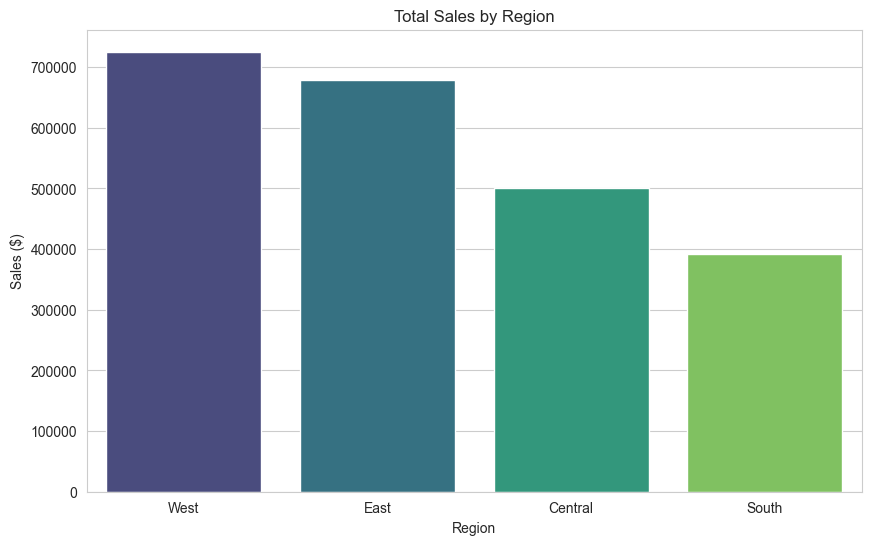

In [13]:
# Group by Region and Sum Sales
regional_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=regional_sales.index, y=regional_sales.values, palette='viridis')
plt.title('Total Sales by Region')
plt.ylabel('Sales ($)')
plt.show()

In [14]:
# Hypothesis: Higher discounts lead to lower profits.
# Split data into High Discount (> 20%) and Low Discount (<= 20%)
high_discount = df[df['Discount'] > 0.2]['Profit']
low_discount = df[df['Discount'] <= 0.2]['Profit']

# Perform T-Test
t_stat, p_val = stats.ttest_ind(high_discount, low_discount)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("Result is Statistically Significant: High discounts negatively impact profit.")
else:
    print("No significant difference found.")

T-Statistic: -22.134190085874568
P-Value: 5.092886028896182e-106
Result is Statistically Significant: High discounts negatively impact profit.


C:\Users\reyma\AppData\Local\Temp\ipykernel_19936\1657737264.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby('Order Date')['Sales'].sum().resample('M').sum()


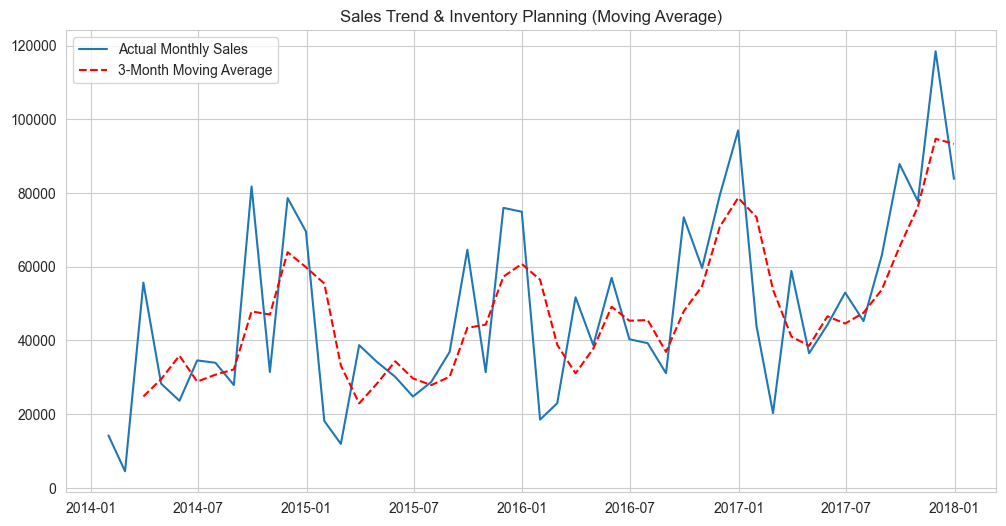

In [15]:
# Aggregate sales by Month
monthly_sales = df.groupby('Order Date')['Sales'].sum().resample('M').sum()

# Calculate 3-Month Moving Average
monthly_sales_ma = monthly_sales.rolling(window=3).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label='Actual Monthly Sales')
plt.plot(monthly_sales_ma, label='3-Month Moving Average', color='red', linestyle='--')
plt.title('Sales Trend & Inventory Planning (Moving Average)')
plt.legend()
plt.show()